<a href="https://colab.research.google.com/github/eroolpal/detect_damagecause/blob/master/20200317firefloodearthfraudnew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:

from fastai.vision import *

In [0]:
folder = 'fire'
file = 'urls_fire.csv'

In [0]:
path = Path('data/damage')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [4]:
from google.colab import files
uploaded = files.upload()

Saving firedamaged.csv to firedamaged.csv


In [0]:
!mv firedamaged.csv data/damage/urls_fire.csv


In [0]:
classes = ['fire','flood','earthquake', 'no damage']

In [7]:
download_images(path/file, dest, max_pics=1200)

In [0]:
folder = 'flood'
file = 'urls_flood.csv'

In [0]:
path = Path('data/damage')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [10]:
from google.colab import files
uploaded = files.upload()

Saving flooddamaged.csv to flooddamaged.csv


In [0]:
!mv flooddamaged.csv data/damage/urls_flood.csv

In [0]:
classes = ['fire','flood','earthquake', 'fraud']

In [13]:
download_images(path/file, dest, max_pics=1200)

In [0]:
folder = 'earthquake'
file = 'urls_earthquake.csv'

In [0]:
path = Path('data/damage')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [16]:
from google.colab import files
uploaded = files.upload()

Saving earthquakedamaged.csv to earthquakedamaged.csv


In [0]:
!mv earthquakedamaged.csv data/damage/urls_earthquake.csv

In [0]:
classes = ['fire','flood','earthquake', 'fraud']

In [19]:
download_images(path/file, dest, max_pics=1200)

In [0]:
folder = 'fraud'
file = 'urls_fraud.csv'

In [0]:
path = Path('data/damage')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [22]:
from google.colab import files
uploaded = files.upload()

Saving goodhousesdamaged.csv to goodhousesdamaged.csv


In [0]:
!mv goodhousesdamaged.csv data/damage/urls_fraud.csv

In [0]:
classes = ['fire','flood','earthquake', 'fraud']

In [26]:
download_images(path/file, dest, max_pics=1200)

In [27]:
#Remove images that are not images at all
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

fire


flood


earthquake


fraud


In [0]:


#set aside 20% of the data to a validation set, random seed is created to get the same validation set everytime
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [29]:
data.classes

['earthquake', 'fire', 'flood', 'fraud']

In [0]:
from fastai.widgets import *


In [0]:

db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:

learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

FileNotFoundError: ignored

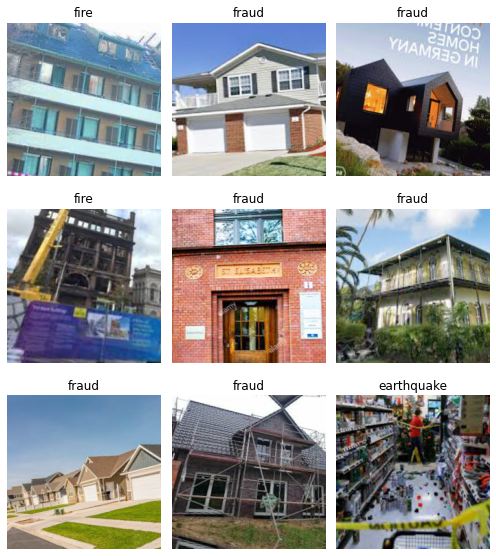

In [32]:
data.show_batch(rows=3, figsize=(7,8))

In [33]:

data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['earthquake', 'fire', 'flood', 'fraud'], 4, 3840, 960)

In [34]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [35]:
#defaults.device= torch.device('gpu')
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.584468,1.085271,0.351042,00:40
1,1.200160,0.850530,0.309375,00:41
2,0.939490,0.788554,0.285417,00:41
3,0.802566,0.779604,0.276042,00:42


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [38]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


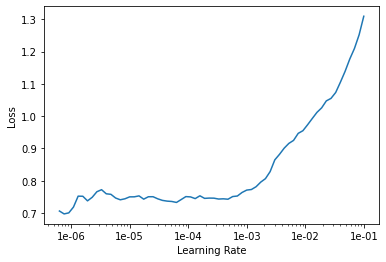

In [40]:
learn.recorder.plot()

In [41]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.756037,0.723541,0.270833,00:43
1,0.624408,0.697722,0.264583,00:44


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [44]:
interp = ClassificationInterpretation.from_learner(learn)

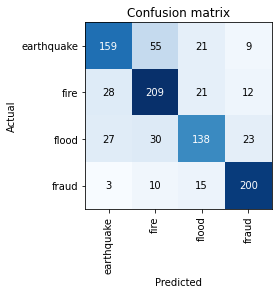

In [45]:

interp.plot_confusion_matrix()

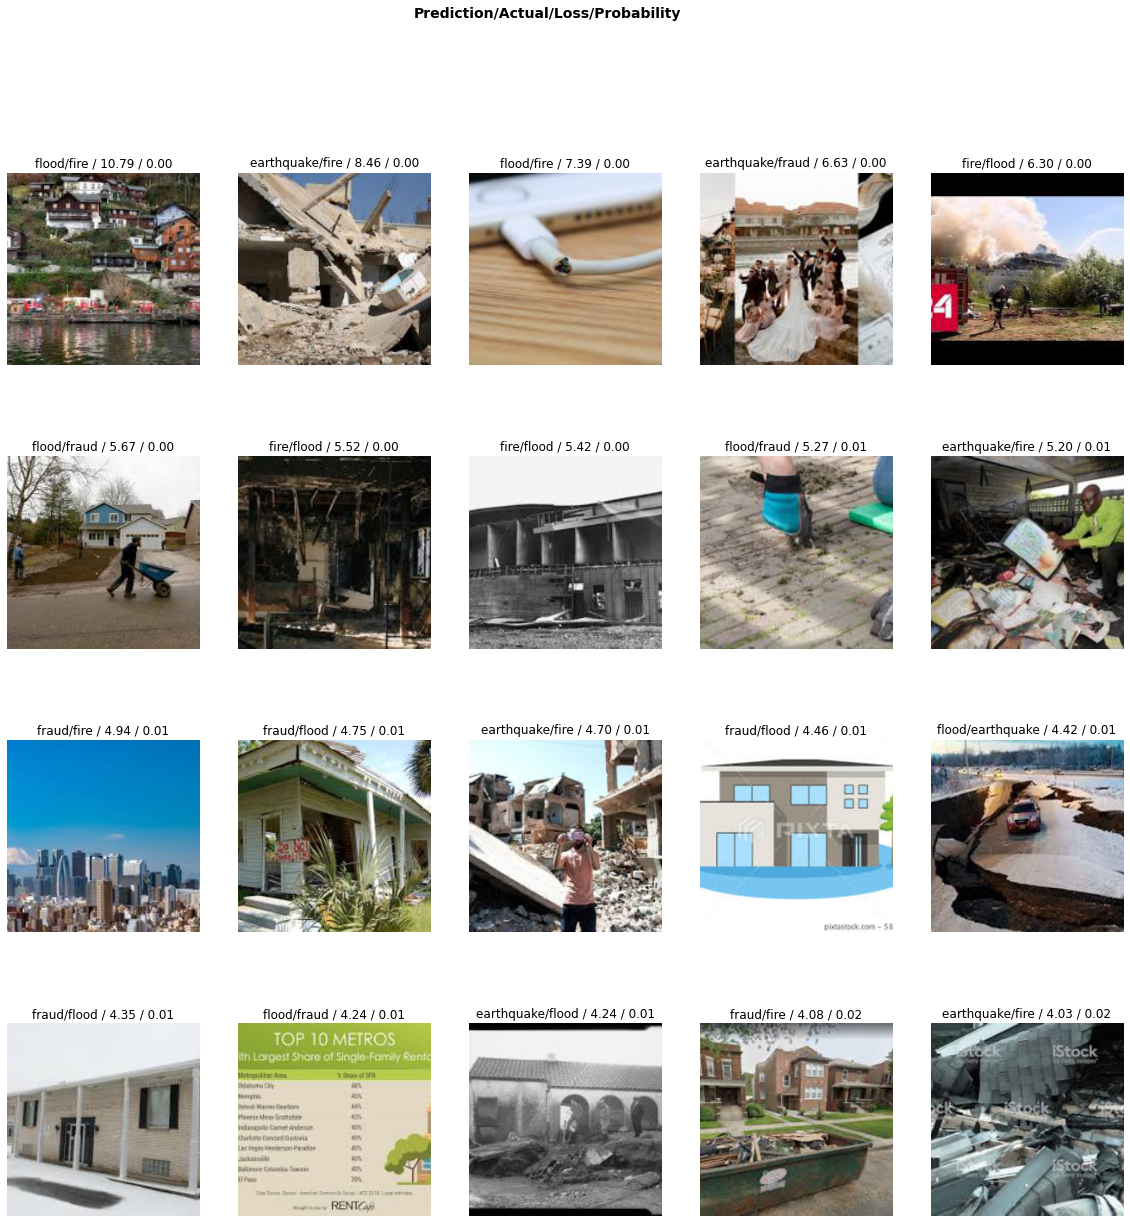

In [47]:
interp.plot_top_losses(20, figsize=(20,20))

Clean up the text

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
#ImageCleaner(ds, idxs, path, duplicates=True)

Putting your model in production

In [0]:

learn.export()

In [0]:

defaults.device = torch.device('cpu')

In [0]:
from google.colab import files
uploaded = files.upload()

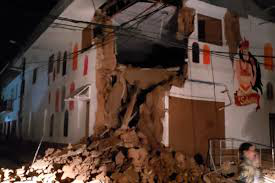

In [0]:
img = open_image('china_earthquake.jpeg')
img

In [0]:

learn = load_learner(path)

In [0]:

pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category earthquake